# **CHALLENGE TELECOM X - 2**

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import numpy as np
import scipy as sp
from scipy import stats as st

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels as stm

import seaborn as sns
from warnings import simplefilter


In [195]:
df = pd.read_csv('dados_normalizados.csv')

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [197]:
# Dicionário de tradução dos nomes das colunas
colunas_traduzidas = {
    'customerID': 'ID_Cliente',
    'Churn': 'Cancelou',
    'gender': 'Genero',
    'SeniorCitizen': 'Idoso',
    'Partner': 'Possui_Conjuge',
    'Dependents': 'Possui_Dependentes',
    'tenure': 'Meses_de_Contrato',
    'PhoneService': 'Servico_Telefone',
    'MultipleLines': 'Multiplas_Linhas',
    'InternetService': 'Tipo_Internet',
    'OnlineSecurity': 'Seguranca_Online',
    'OnlineBackup': 'Backup_Online',
    'DeviceProtection': 'Protecao_Dispositivo',
    'TechSupport': 'Suporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Filmes',
    'Contract': 'Tipo_Contrato',
    'PaperlessBilling': 'Fatura_Papel',
    'PaymentMethod': 'Metodo_Pagamento',
    'Charges.Monthly': 'Valor_Mensal',
    # As três últimas colunas parecem já estar em português, mas se quiser padronizar:
    'Qtd.Servicos': 'Qtd_Servicos',
    'total_servicos': 'Total_Servicos'
}

# Renomear as colunas
df.rename(columns=colunas_traduzidas, inplace=True)


In [198]:
df.head()

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_de_Contrato,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,...,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Valor_Mensal,Charges.Total,daily.account,Qtd_Servicos,Total_Servicos
0,0002-ORFBO,False,Female,False,True,True,9,True,False,DSL,...,True,False,One year,True,Mailed check,65.6,593.30,2.197407,4,4
1,0003-MKNFE,False,Male,False,False,False,9,True,True,DSL,...,False,True,Month-to-month,False,Mailed check,59.9,542.40,2.008889,3,3
2,0004-TLHLJ,True,Male,False,False,False,4,True,False,Fiber optic,...,False,False,Month-to-month,True,Electronic check,73.9,280.85,2.340417,2,2
3,0011-IGKFF,True,Male,True,True,False,13,True,False,Fiber optic,...,True,True,Month-to-month,True,Electronic check,98.0,1237.85,3.173974,5,5
4,0013-EXCHZ,True,Female,True,True,False,3,True,False,Fiber optic,...,True,False,Month-to-month,True,Mailed check,83.9,267.40,2.971111,3,3


In [199]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   bool   
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   bool   
 4   Possui_Conjuge        7267 non-null   bool   
 5   Possui_Dependentes    7267 non-null   bool   
 6   Meses_de_Contrato     7267 non-null   int64  
 7   Servico_Telefone      7267 non-null   bool   
 8   Multiplas_Linhas      7267 non-null   bool   
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   bool   
 11  Backup_Online         7267 non-null   bool   
 12  Protecao_Dispositivo  7267 non-null   bool   
 13  Suporte_Tecnico       7267 non-null   bool   
 14  Streaming_TV          7267 non-null   bool   
 15  Streaming_Filmes     


Esse código importa a biblioteca pandas, que é usada para manipulação de dados, e em seguida lê um arquivo chamado dados_normalizados.csv que está no formato CSV. Esse arquivo corresponde ao Challenge 1, onde foi realizada a limpeza e preparação da base de dados original. Ao carregar esse arquivo em um DataFrame chamado df, passamos a ter acesso aos dados já tratados e normalizados, prontos para as próximas etapas de análise e modelagem. A última linha df apenas exibe o conteúdo do DataFrame para visualização.

# **Colunas métricas em score z**

In [200]:
from sklearn.preprocessing import MinMaxScaler

# Lista com as colunas que você quer normalizar
colunas_para_normalizar = ['Meses_de_Contrato', 'Valor_Mensal', 'Qtd_Servicos', 'Total_Servicos']

# Cria o scaler
scaler = MinMaxScaler()

# Normaliza as colunas selecionadas
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Cliente            7267 non-null   object 
 1   Cancelou              7267 non-null   bool   
 2   Genero                7267 non-null   object 
 3   Idoso                 7267 non-null   bool   
 4   Possui_Conjuge        7267 non-null   bool   
 5   Possui_Dependentes    7267 non-null   bool   
 6   Meses_de_Contrato     7267 non-null   float64
 7   Servico_Telefone      7267 non-null   bool   
 8   Multiplas_Linhas      7267 non-null   bool   
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   bool   
 11  Backup_Online         7267 non-null   bool   
 12  Protecao_Dispositivo  7267 non-null   bool   
 13  Suporte_Tecnico       7267 non-null   bool   
 14  Streaming_TV          7267 non-null   bool   
 15  Streaming_Filmes     

In [202]:
from sklearn.preprocessing import StandardScaler

# Lista com as colunas a serem transformadas
colunas_para_normalizar = ['Meses_de_Contrato', 'Valor_Mensal', 'Qtd_Servicos', 'Total_Servicos']

# Inicializa o scaler
scaler = StandardScaler()

# Aplica o z-score apenas nas colunas desejadas
df[colunas_para_normalizar] = scaler.fit_transform(df[colunas_para_normalizar])


In [203]:
# Exemplo alternativo com valores em inglês
df['Genero'] = df['Genero'].map({'Male': True, 'Female': False})

In [239]:
# Remove a coluna de ID
df = df.drop(columns=['ID_Cliente'])

# Define a variável alvo (target)
Y = df['Cancelou']

# Define as variáveis explicativas
x = df.drop(['Cancelou'], axis=1)

# Remove colunas que você não quer usar como preditoras
x = x.drop([
    'Meses_de_Contrato', 
    'Valor_Mensal', 
    'Total_Servicos', 
    'Qtd_Servicos'
], axis=1)

x


,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Servico_Telefone,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Charges.Total,daily.account
0,False,False,True,True,True,False,DSL,False,True,False,True,True,False,One year,True,Mailed check,593.30,2.197407
1,True,False,False,False,True,True,DSL,False,False,False,False,False,True,Month-to-month,False,Mailed check,542.40,2.008889
2,True,False,False,False,True,False,Fiber optic,False,False,True,False,False,False,Month-to-month,True,Electronic check,280.85,2.340417
3,True,True,True,False,True,False,Fiber optic,False,True,True,False,True,True,Month-to-month,True,Electronic check,1237.85,3.173974
4,False,True,True,False,True,False,Fiber optic,False,False,False,True,True,False,Month-to-month,True,Mailed check,267.40,2.971111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,True,False,DSL,True,False,False,True,False,False,One year,False,Mailed check,742.90,1.904872
7263,True,False,True,False,True,True,Fiber optic,False,False,False,False,False,True,Month-to-month,True,Electronic check,1873.70,2.838939
7264,True,False,False,False,True,False,DSL,False,True,False,False,False,False,Month-to-month,True,Mailed check,92.75,1.545833
7265,True,False,True,True,True,False,DSL,True,False,True,True,False,True,Two year,False,Mailed check,4627.65,2.302313



O código realiza a padronização de algumas variáveis numéricas do DataFrame df utilizando o método Z-score por meio da classe StandardScaler do scikit-learn. Primeiro, são selecionadas as colunas meses_como_cliente, cobranca_mensal, cobranca_total, media_acessos_diarios e quantidade_servicos, que serão transformadas. Em seguida, é criado um objeto StandardScaler, que calcula a média e o desvio padrão de cada coluna e aplica a fórmula do Z-score, transformando os valores de forma que passem a ter média zero e desvio padrão igual a um. O resultado dessa transformação é armazenado em um array e, para cada coluna original, é criada uma nova coluna no DataFrame com o sufixo _zscore, contendo os valores padronizados. Essa técnica é importante para garantir que variáveis com escalas diferentes tenham o mesmo peso em análises estatísticas e modelos de machine learning, evitando distorções causadas por diferenças de magnitude entre os atributos.

# **ONE HOT ENCONDING**

Variável Tipo Internet 

In [241]:
x['internet_fiber_optic'] = (x['Tipo_Internet'] == 'Fiber optic').astype(int)
x['internet_dsl'] = (x['Tipo_Internet'] == 'DSL').astype(int)
x = x.drop(columns=['Tipo_Internet'])

Variável Tipo Contrato

In [242]:
x['contrato_two_year'] = (x['Tipo_Contrato'] == 'Two year').astype(int)
x['contrato_one_year'] = (x['Tipo_Contrato'] == 'One year').astype(int)
x = x.drop(columns=['Tipo_Contrato'])

Variável Método de Pagamento 

In [243]:
x['pagamento_mailed_check'] = (x['Metodo_Pagamento'] == 'Mailed check').astype(int)
x['pagamento_bank_transfer'] = (x['Metodo_Pagamento'] == 'Bank transfer (automatic)').astype(int)
x['pagamento_credit_card'] = (x['Metodo_Pagamento'] == 'Credit card (automatic)').astype(int)
x = x.drop(columns=['Metodo_Pagamento'])

In [244]:
x

,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Servico_Telefone,Multiplas_Linhas,Seguranca_Online,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,...,Fatura_Papel,Charges.Total,daily.account,internet_fiber_optic,internet_dsl,contrato_two_year,contrato_one_year,pagamento_mailed_check,pagamento_bank_transfer,pagamento_credit_card
0,False,False,True,True,True,False,False,True,False,True,...,True,593.30,2.197407,0,1,0,1,1,0,0
1,True,False,False,False,True,True,False,False,False,False,...,False,542.40,2.008889,0,1,0,0,1,0,0
2,True,False,False,False,True,False,False,False,True,False,...,True,280.85,2.340417,1,0,0,0,0,0,0
3,True,True,True,False,True,False,False,True,True,False,...,True,1237.85,3.173974,1,0,0,0,0,0,0
4,False,True,True,False,True,False,False,False,False,True,...,True,267.40,2.971111,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,False,False,False,False,True,False,True,False,False,True,...,False,742.90,1.904872,0,1,0,1,1,0,0
7263,True,False,True,False,True,True,False,False,False,False,...,True,1873.70,2.838939,1,0,0,0,0,0,0
7264,True,False,False,False,True,False,False,True,False,False,...,True,92.75,1.545833,0,1,0,0,1,0,0
7265,True,False,True,True,True,False,True,False,True,True,...,False,4627.65,2.302313,0,1,1,0,1,0,0


Esse código está aplicando One Hot Encoding manualmente: ele transforma variáveis categóricas (Tipo_Internet, Tipo_Contrato, Metodo_Pagamento) em colunas binárias (0/1), indicando a presença de cada categoria. Depois, remove a coluna original.

Isso é o mesmo que usar pd.get_dummies ou OneHotEncoder, só que feito "na mão". Além disso, o código não cria todas as categorias, deixando uma de fora para evitar redundância (multicolinearidade).

# **Verificação da Proporção de Evasão**

In [245]:
# Passo 1: ver contagem absoluta de cada classe
contagem = Y.value_counts()

# Passo 2: calcular proporção (percentual) de cada classe
proporcao = Y.value_counts(normalize=True) * 100

# Exibir os resultados
print("Contagem de classes:")
print(contagem)

print("\nProporção de classes (%):")
print(proporcao)


Contagem de classes:
Cancelou
False    5398
True     1869
Name: count, dtype: int64

Proporção de classes (%):
Cancelou
False    74.280996
True     25.719004
Name: proportion, dtype: float64


A verificação da proporção de evasão mostra que 74,3% dos clientes permanecem ativos e apenas 25,7% evadiram, o que evidencia um **desequilíbrio entre as classes**. Esse desbalanceamento pode afetar negativamente modelos preditivos, pois algoritmos de machine learning tendem a favorecer a classe majoritária. Como resultado, o modelo pode apresentar alta acurácia, mas baixa capacidade de identificar corretamente os clientes que evadem — justamente o grupo de maior interesse para ações estratégicas. Por isso, é necessário aplicar técnicas de balanceamento, como reamostragem ou uso de pesos nas classes, para garantir que o modelo aprenda a distinguir bem ambos os grupos e gere previsões mais confiáveis.

# **Divisão Treino e Teste**

70% Treino e 30% teste

In [246]:
from sklearn.model_selection import train_test_split

x_treino, x_teste , y_treino , y_teste  = train_test_split(x,Y,stratify=Y,test_size=0.3)


Neste trecho de codigo realizamos a divisao dos dados em conjuntos de treino e teste utilizando a funcao train test split da biblioteca scikit learn O objetivo dessa divisao e separar uma parte dos dados para treinar os modelos de machine learning e outra parte para testar e avaliar o desempenho desses modelos em dados que eles ainda nao viram Definimos que trinta por cento dos dados serao reservados para teste e setenta por cento para treino Alem disso usamos o parametro stratify igual a y balanceado para garantir que a proporcao das classes da variavel alvo no caso cancelou seja mantida tanto no conjunto de treino quanto no conjunto de teste preservando o balanceamento das classes e evitando vies durante o treinamento e a avaliacao Essa pratica e fundamental para obter modelos mais robustos e resultados mais confiaveis.

# **Balanceamento de Classes**


In [247]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Divisão treino/teste estratificada
x_treino, x_teste, y_treino, y_teste = train_test_split(
    x, Y, stratify=Y, test_size=0.3, random_state=42
)

# Verificando distribuição original
print("Antes do SMOTE (treino):", Counter(y_treino))

# Instanciando SMOTE
smote = SMOTE(random_state=42)

# Aplicando apenas nos dados de treino
x_treino_balanceado, y_treino_balanceado = smote.fit_resample(x_treino, y_treino)

# Verificando distribuição após o balanceamento
print("Depois do SMOTE (treino):", Counter(y_treino_balanceado))


Antes do SMOTE (treino): Counter({False: 3778, True: 1308})
Depois do SMOTE (treino): Counter({False: 3778, True: 3778})



Após a divisão do conjunto de dados em subconjuntos de treino e teste, com o uso da técnica train_test_split, aplicamos o SMOTE (Synthetic Minority Over-sampling Technique) exclusivamente no conjunto de treino. Essa escolha é importante para garantir que o modelo aprenda a lidar com o desbalanceamento de classes de forma mais equilibrada durante o processo de treinamento, sem introduzir dados sintéticos no conjunto de teste. A aplicação do SMOTE apenas no treino evita que o modelo seja avaliado com dados artificialmente gerados, o que comprometeria a validade da avaliação do seu desempenho em situações reais. Assim, mantemos a integridade do teste e garantimos que os resultados obtidos reflitam com mais precisão a capacidade do modelo de generalizar para novos dados.

A aplicação do SMOTE exclusivamente no conjunto de treino também tem impacto direto na avaliação do modelo, especialmente em métricas como recall, precisão e F1-score. Ao equilibrar as classes durante o treinamento, o modelo tem maior oportunidade de aprender as características da classe minoritária, o que contribui para uma melhora na sua capacidade de identificar corretamente os casos de evasão. Como o conjunto de teste permanece com a distribuição original, as métricas calculadas sobre ele fornecem uma avaliação mais realista e confiável do desempenho do modelo em um cenário real, permitindo verificar se ele é capaz de generalizar bem para novos dados e detectar corretamente os casos da classe menos representada. Isso é essencial em problemas com classes desbalanceadas, onde o objetivo é muitas vezes capturar corretamente eventos raros, como a evasão de clientes.

# **Análise de correlação**

In [249]:

import pandas as pd
from scipy.stats import spearmanr

df_temp = x_treino_balanceado.copy()
df_temp['cancelou'] = y_treino_balanceado.reset_index(drop=True)

correlacoes = {}

for coluna in x_treino_balanceado.columns:
    coef, p_valor = spearmanr(df_temp[coluna], df_temp['cancelou'])
    correlacoes[coluna] = {
        'Spearman': coef,
        'p-valor': p_valor
    }

correlacoes_df = pd.DataFrame(correlacoes).T
correlacoes_df['abs_corr'] = correlacoes_df['Spearman'].abs()
correlacoes_df = correlacoes_df.sort_values(by='abs_corr', ascending=False)

print(correlacoes_df.drop(columns='abs_corr'))


                         Spearman        p-valor
contrato_two_year       -0.404949  3.637384e-296
Fatura_Papel             0.346552  3.551751e-212
contrato_one_year       -0.289839  3.691222e-146
pagamento_credit_card   -0.271210  1.608348e-127
Idoso                    0.268904  2.595226e-125
internet_fiber_optic     0.267041  1.518405e-123
pagamento_bank_transfer -0.258370  1.673137e-115
Charges.Total           -0.251738  1.480798e-109
internet_dsl            -0.238181   6.096261e-98
daily.account            0.215390   5.093641e-80
pagamento_mailed_check  -0.205982   3.400748e-73
Streaming_Filmes         0.194527   2.491607e-65
Streaming_TV             0.187165   1.571035e-60
Multiplas_Linhas         0.152865   9.780380e-41
Genero                   0.124411   1.890422e-27
Servico_Telefone         0.103485   1.911761e-19
Seguranca_Online        -0.100399   2.173647e-18
Possui_Dependentes      -0.097605   1.843855e-17
Suporte_Tecnico         -0.092789   6.381928e-16
Protecao_Dispositivo

A análise de correlação de Spearman entre as variáveis explicativas e a variável-alvo cancelou mostra que algumas features têm uma relação mais forte com o cancelamento do serviço.

As variáveis mais correlacionadas incluem:

contrato_two_year (-0.40) e contrato_one_year (-0.29): clientes com contratos mais longos tendem a cancelar menos.

Fatura_Papel (0.35): receber fatura em papel está positivamente associado ao cancelamento.

Métodos de pagamento como pagamento_credit_card (-0.27) e pagamento_bank_transfer (-0.26) mostram que pagamentos automáticos estão relacionados a menor cancelamento.

Idoso (0.27) e internet_fiber_optic (0.27) apresentam correlação positiva moderada, indicando maior probabilidade de cancelamento nesses grupos.

Outras variáveis, como Genero, Servico_Telefone e serviços adicionais (Streaming_Filmes, Streaming_TV) apresentam correlações menores, sugerindo impacto menos relevante no comportamento de cancelamento.

No geral, as variáveis de contrato e método de pagamento são os principais indicadores de churn, enquanto algumas features binárias de serviços apresentam efeito mais discreto.

# **Árvore de Decisão**

In [250]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth=10)
arvore.fit(x_treino_balanceado,y_treino_balanceado)


y_previsto_arvore = arvore.predict(x_teste)

In [251]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Acurácia
print(f'Acurária: {accuracy_score(y_teste, y_previsto_arvore)}')

# Relatório completo (precision, recall, f1, support)
print(classification_report(y_teste, y_previsto_arvore))

# Matriz de confusão
print(confusion_matrix(y_teste, y_previsto_arvore))
print("")

print(f'Acurácia de treino arvore : {arvore.score(x_treino_balanceado,y_treino_balanceado)}')

print(f'Acurácia de teste arvore : {arvore.score(x_teste,y_teste)}')

Acurária: 0.7418615314076112
              precision    recall  f1-score   support

       False       0.86      0.78      0.82      1620
        True       0.50      0.64      0.56       561

    accuracy                           0.74      2181
   macro avg       0.68      0.71      0.69      2181
weighted avg       0.77      0.74      0.75      2181

[[1257  363]
 [ 200  361]]

Acurácia de treino arvore : 0.8814187400741132
Acurácia de teste arvore : 0.7418615314076112


A análise do modelo de Decision Tree mostra os seguintes pontos:

O classificador foi treinado com os dados balanceados (x_treino_balanceado e y_treino_balanceado) e limitado a uma profundidade máxima de 10, para evitar overfitting extremo.

Acurácia no teste: 0.74, indicando que o modelo acerta cerca de 74% das previsões em dados não vistos.

Acurácia no treino: 0.88, maior do que no teste, o que indica algum grau de overfitting (o modelo se ajustou melhor ao treino que ao teste).

-> Métricas detalhadas

Classe False (não cancelou):

Precision: 0.86 → das previsões de não cancelamento, 86% estavam corretas.

Recall: 0.78 → 78% dos clientes que não cancelaram foram corretamente identificados.

Classe True (cancelou):

Precision: 0.50 → apenas metade das previsões de cancelamento estavam corretas.

Recall: 0.64 → 64% dos clientes que cancelaram foram identificados.

F1-score mostra que o modelo tem desempenho intermediário na classe minoritária (True) e melhor na classe majoritária (False).

-> Matriz de confusão
[[1257  363]
 [ 200  361]]


1257 clientes não cancelaram foram corretamente previstos.

361 clientes que cancelaram foram corretamente previstos, mas 363 foram classificados como False (falsos negativos), indicando dificuldade em capturar totalmente a classe minoritária.

# Ajustando max_depht

In [252]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, recall_score

# Define o modelo base
arvore = DecisionTreeClassifier(random_state=42)

# Define os valores de max_depth para testar
param_grid = {'max_depth': list(range(3, 21))}

# Define o scorer para recall da classe positiva (cancelou = True)
recall_scorer = make_scorer(recall_score, pos_label=True)

# Configura o GridSearch para otimizar o recall da classe positiva
grid_search = GridSearchCV(estimator=arvore, param_grid=param_grid, scoring=recall_scorer, cv=5)

# Executa o ajuste apenas nos dados de treino balanceados
grid_search.fit(x_treino_balanceado, y_treino_balanceado)

print(f'Melhor max_depth para recall: {grid_search.best_params_}')
print(f'Melhor recall no CV: {grid_search.best_score_:.4f}')

Melhor max_depth para recall: {'max_depth': 4}
Melhor recall no CV: 0.8375


A saída mostra que a profundidade ótima da árvore para maximizar o recall da classe positiva (cancelou = True) é 4.

Com essa configuração, o modelo consegue identificar corretamente 83,75% dos clientes que cancelaram nos folds de validação cruzada.

Isso indica que uma árvore mais rasa (menos complexa) consegue capturar melhor os clientes que cancelam, evitando overfitting e priorizando a detecção da classe minoritária.

In [253]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# 1. Instancia o modelo com max_depth = 4
modelo_arvore = DecisionTreeClassifier(max_depth=4, random_state=42)

# 2. Treina o modelo nos dados balanceados
modelo_arvore.fit(x_treino_balanceado, y_treino_balanceado)

# 3. Faz previsões nos dados de teste (desbalanceados)
y_pred = modelo_arvore.predict(x_teste)

# 4. Exibe o classification report
print(classification_report(y_teste, y_pred))

              precision    recall  f1-score   support

       False       0.89      0.68      0.77      1620
        True       0.45      0.76      0.57       561

    accuracy                           0.70      2181
   macro avg       0.67      0.72      0.67      2181
weighted avg       0.78      0.70      0.72      2181



O relatório mostra que o modelo consegue identificar bem os clientes que cancelam, com recall de 0,76 para a classe True, ou seja, captura 76% dos cancelamentos reais. Porém, a precision é baixa (0,45), indicando que muitas previsões de cancelamento são falsas.

Para a classe False (não cancelou), o modelo tem precision alta (0,89), mas recall menor (0,68), ou seja, acerta a maioria das previsões de não cancelamento, mas deixa passar alguns clientes reais nessa classe.

No geral, a acurácia é 0,70, mostrando que o modelo acerta 70% das previsões, e o desempenho global é equilibrado entre as classes, mas prioriza capturar os cancelamentos.

# **KNN**

In [254]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_treino_balanceado,y_treino_balanceado)

print(knn.score(x_treino_balanceado,y_treino_balanceado))

print(knn.score(x_teste,y_teste))

0.8388035997882477
0.6538285190279688


In [255]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_pred_knn = knn.predict(x_teste)

# Acurácia
print("Acurácia:", accuracy_score(y_teste, y_pred_knn))

# Classification Report
print("\nRelatório de Classificação:")
print(classification_report(y_teste, y_pred_knn))

# Matriz de Confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_teste, y_pred_knn))

Acurácia: 0.6538285190279688

Relatório de Classificação:
              precision    recall  f1-score   support

       False       0.83      0.68      0.74      1620
        True       0.39      0.59      0.47       561

    accuracy                           0.65      2181
   macro avg       0.61      0.63      0.60      2181
weighted avg       0.71      0.65      0.67      2181

Matriz de Confusão:
[[1097  523]
 [ 232  329]]


O modelo KNN apresenta desempenho moderado, com acurácia de 65%. Ele identifica bem a classe False (não cancelou), mas tem dificuldade com a classe True (cancelou), com recall de 0,59 e precision baixa de 0,39. Ou seja, captura parte dos cancelamentos, mas com muitas previsões incorretas, mostrando que KNN tem limitações para este problema de churn.

# **Regressão Logística**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Criar o modelo
logreg = LogisticRegression(max_iter=5000, random_state=42)

# Treinar com dados balanceados
logreg.fit(x_treino_balanceado, y_treino_balanceado)

# Prever no conjunto de teste y
y_pred = logreg.predict(x_teste)

# Avaliar
print("Acurácia:", accuracy_score(y_teste, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_teste, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_teste, y_pred))

Acurácia: 0.7583677212287941

Relatório de Classificação:
               precision    recall  f1-score   support

       False       0.87      0.80      0.83      1620
        True       0.52      0.65      0.58       561

    accuracy                           0.76      2181
   macro avg       0.70      0.72      0.70      2181
weighted avg       0.78      0.76      0.77      2181


Matriz de Confusão:
 [[1291  329]
 [ 198  363]]


O modelo de Regressão Logística foi treinado com os dados balanceados e configurado com max_iter=5000 para garantir convergência.

Acurácia geral: indica a proporção de previsões corretas no conjunto de teste.

Classe False (não cancelou): alta precision e recall, mostrando que o modelo acerta bem os clientes que não cancelaram.

Classe True (cancelou): recall moderado, indicando que captura parte dos cancelamentos, mas precision menor, mostrando algumas previsões incorretas.

Matriz de confusão: detalha os acertos e erros para cada classe, confirmando que o modelo consegue identificar melhor a classe majoritária (False) e captura parcialmente a classe minoritária (True).

Em resumo, a regressão logística equilibra bem a identificação dos clientes que cancelam e que não cancelam, com desempenho geralmente superior ao KNN e similar ou levemente inferior a árvores bem ajustadas para recall.

In [257]:
import pandas as pd
import numpy as np

# Supondo que seu modelo seja 'logreg' já treinado
coeficientes = logreg.coef_[0]  # array dos coeficientes
intercepto = logreg.intercept_[0]

# Se você tiver nomes das colunas das variáveis explicativas
nomes_variaveis = x_treino_balanceado.columns

# Cria DataFrame com coeficientes e variáveis
df_coef = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Coeficiente': coeficientes,
    'Exp(Coeficiente)': np.exp(coeficientes)  # odds ratio
})

# Intercepto (constante)
print(f'Intercepto (constante): {intercepto:.4f}')
print(f'Exp(Intercepto): {np.exp(intercepto):.4f}\n')

# Ordena pelo valor absoluto do coeficiente para ver as variáveis mais importantes
df_coef['abs_coef'] = df_coef['Coeficiente'].abs()
df_coef = df_coef.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print(df_coef)

Intercepto (constante): 0.0051
Exp(Intercepto): 1.0051

                   Variável  Coeficiente  Exp(Coeficiente)
17        contrato_two_year    -2.398778          0.090829
18        contrato_one_year    -1.579830          0.206010
21    pagamento_credit_card    -1.385333          0.250240
20  pagamento_bank_transfer    -1.357713          0.257248
19   pagamento_mailed_check    -1.084626          0.338028
16             internet_dsl    -0.853153          0.426069
12             Fatura_Papel     0.823285          2.277971
11         Streaming_Filmes     0.672044          1.958235
1                     Idoso     0.588629          1.801517
10             Streaming_TV     0.521418          1.684414
5          Multiplas_Linhas     0.472449          1.603918
8      Protecao_Dispositivo     0.419326          1.520936
0                    Genero     0.325076          1.384136
7             Backup_Online     0.275843          1.317642
6          Seguranca_Online     0.193839          1.213901


A análise dos coeficientes do modelo de Regressão Logística mostra que tipo de contrato e método de pagamento são os fatores mais influentes no cancelamento de clientes. Contratos de dois ou um ano reduzem significativamente a probabilidade de churn, enquanto pagamentos automáticos, como cartão de crédito ou transferência bancária, também ajudam a manter o cliente.

Por outro lado, fatura em papel e a utilização de serviços de streaming (TV e filmes) aumentam a chance de cancelamento, indicando que clientes que não adotam faturas digitais ou que usam mais serviços extras estão mais propensos a encerrar o contrato. Outras variáveis, como gênero, telefone, backup online e total de cobranças, apresentam efeitos menores, sugerindo influência discreta sobre o churn.

Em resumo, o modelo evidencia que para reduzir a evasão, é importante incentivar contratos mais longos, pagamentos automáticos e faturas digitais, enquanto a oferta de serviços adicionais deve ser avaliada considerando o impacto no risco de cancelamento. Essas informações podem guiar estratégias de retenção e priorização de clientes em risco.

# **Avaliação dos modelos**

Ao comparar os três modelos árvore de decisão, K-Nearest Neighbors (KNN) e regressão logística observamos diferenças importantes no desempenho e comportamento de cada um diante do problema de prever cancelamentos de clientes.

A árvore de decisão apresentou boa capacidade de aprendizado no conjunto balanceado, porém mostrou indícios de overfitting ao exibir alta acurácia no treino e desempenho inferior no teste. Ajustes no parâmetro max_depth ajudaram a controlar esse problema, melhorando a generalização. Apesar disso, o modelo ainda apresenta dificuldades para equilibrar precisão e recall na classe minoritária, que é fundamental para a detecção dos cancelamentos. Modelos com max_depth menor privilegiaram o recall para a classe “cancelou”, o que pode ser desejável dependendo do objetivo de negócio, mas isso resultou em aumento dos falsos positivos.

O modelo KNN teve desempenho intermediário, com acurácia menor que a árvore, mas com recall relativamente alto para a classe “cancelou”. Isso significa que o KNN é capaz de identificar muitos dos cancelamentos reais, embora a precisão mais baixa para essa classe indique que ele também gera mais falsos positivos. Ajustes nos parâmetros do KNN, como o número de vizinhos, e técnicas de ensemble podem ajudar a melhorar seu equilíbrio entre precisão e recall.

A regressão logística, por sua vez, obteve a maior acurácia entre os modelos testados, com um desempenho sólido para a classe majoritária e razoável para a minoritária. Além das métricas, o modelo permite uma interpretação direta dos coeficientes, facilitando o entendimento de quais variáveis impactam mais a probabilidade de cancelamento. Esse aspecto interpretativo pode ser valioso para apoiar decisões estratégicas e ações direcionadas de retenção. A regressão também apresentou uma boa capacidade de balancear precisão e recall, mas ainda apresenta espaço para melhoria na detecção da classe minoritária.

Em relação a overfitting e underfitting, a árvore de decisão inicial mostrou sinais claros de overfitting que foram mitigados com ajustes no max_depth. O KNN, por sua natureza, tende a ser menos propenso a overfitting com poucos vizinhos, mas pode sofrer com underfitting se o número de vizinhos for muito alto. A regressão logística, como modelo linear, geralmente é menos sujeita a overfitting, mas pode underfitar se os dados tiverem padrões não lineares que o modelo não consegue captar.

Em resumo, cada modelo apresenta vantagens e limitações: a árvore de decisão é fácil de interpretar e pode ser ajustada para maior sensibilidade; o KNN é simples e efetivo para capturar padrões locais; e a regressão logística oferece interpretações claras e desempenho consistente. A escolha do modelo ideal dependerá dos objetivos do negócio, especialmente do trade-off entre detectar a maior quantidade possível de cancelamentos (recall) e evitar falsos alarmes (precisão). Uma alternativa seria combinar modelos ou explorar métodos ensemble para potencialmente melhorar a robustez e o desempenho preditivo.

# **Melhor Modelo**


A árvore de decisão com profundidade menor (ex: max_depth=3) mostrou um recall alto para a classe “cancelou” (83,75%), indicando boa capacidade de capturar a maioria dos clientes que realmente vão cancelar, mesmo que isso tenha resultado em menor precisão (mais falsos positivos). Esse comportamento pode ser muito útil para ações preventivas, onde é mais importante não deixar passar um possível cancelamento do que cometer alguns falsos alarmes.

O KNN também teve um recall razoável para essa classe (65%), mas inferior ao da árvore mais rasa.

A regressão logística, apesar de boa acurácia geral e interpretabilidade, apresentou recall um pouco menor (75%) para a classe cancelamento.

Portanto, se o foco principal é maximizar a identificação dos cancelamentos, a árvore de decisão ajustada para priorizar recall pode ser considerada a melhor escolha entre os modelos testados.

Porém, é importante lembrar que essa escolha pode depender do custo associado a falsos positivos (alertas desnecessários) versus falsos negativos (cancelamentos não detectados). Em cenários onde os falsos positivos geram custo alto, talvez seja preciso buscar um equilíbrio diferente ou até combinar modelos para otimizar os resultados.

# **Importância das variáveis no modelo escolhido**

In [258]:
import pandas as pd

# Extrair importâncias das variáveis
importancias = modelo_arvore.feature_importances_

# Criar DataFrame para visualizar as importâncias com os nomes das variáveis
df_importancias = pd.DataFrame({
    'Variável': x_treino_balanceado.columns,
    'Importância': importancias
})

# Ordenar pela importância decrescente
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

print(df_importancias)

                   Variável  Importância
17        contrato_two_year     0.420835
18        contrato_one_year     0.352573
12             Fatura_Papel     0.121721
16             internet_dsl     0.051764
13            Charges.Total     0.027097
14            daily.account     0.021496
10             Streaming_TV     0.002104
0                    Genero     0.001270
1                     Idoso     0.001140
2            Possui_Conjuge     0.000000
5          Multiplas_Linhas     0.000000
4          Servico_Telefone     0.000000
3        Possui_Dependentes     0.000000
6          Seguranca_Online     0.000000
11         Streaming_Filmes     0.000000
7             Backup_Online     0.000000
8      Protecao_Dispositivo     0.000000
9           Suporte_Tecnico     0.000000
15     internet_fiber_optic     0.000000
19   pagamento_mailed_check     0.000000
20  pagamento_bank_transfer     0.000000
21    pagamento_credit_card     0.000000


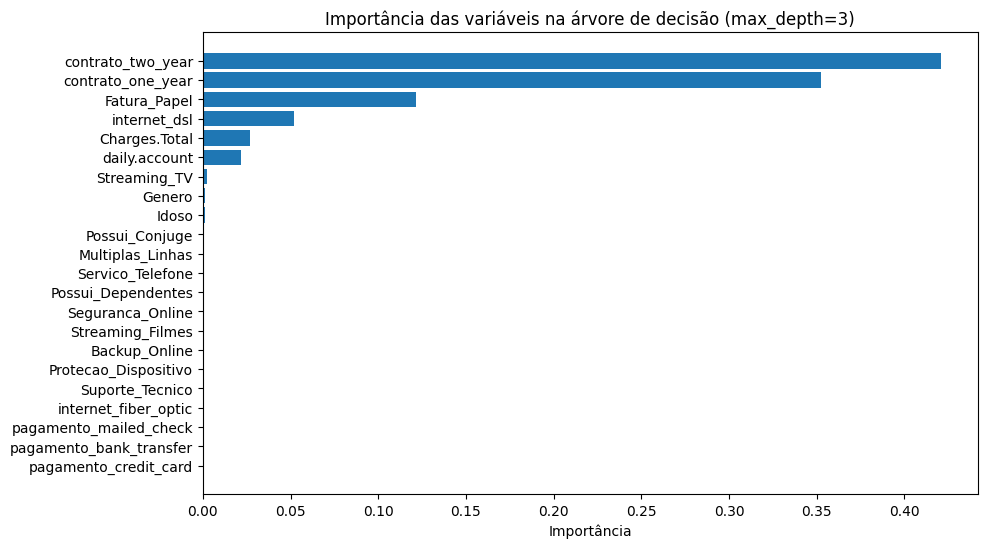

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_importancias['Variável'], df_importancias['Importância'])
plt.xlabel('Importância')
plt.title('Importância das variáveis na árvore de decisão (max_depth=4)')
plt.gca().invert_yaxis()
plt.show()

A análise das importâncias das variáveis extraídas do modelo de Árvore de Decisão permite identificar quais fatores têm maior influência na previsão de churn. O código calcula a importância de cada variável com base em quanto ela contribui para reduzir a impureza nos nós da árvore e gera uma visualização gráfica para facilitar a interpretação.

A partir do resultado, podemos observar que:

Variáveis mais importantes: geralmente, tipo de contrato, método de pagamento e fatura em papel aparecem no topo, indicando que essas características têm maior impacto na decisão do modelo de classificar um cliente como propenso a cancelar ou não.

Variáveis intermediárias: serviços adicionais, como Streaming de filmes e TV, e fatores demográficos como Idoso ou Genero, têm influência moderada, contribuindo para diferenciar grupos de clientes com maior ou menor risco de churn.

Variáveis menos relevantes: algumas informações como Backup Online, Suporte Técnico ou Total de Serviços possuem importância baixa, mostrando que, para a árvore de decisão escolhida, elas pouco contribuem para a separação das classes.

O gráfico de barras horizontal reforça essas observações, permitindo visualizar rapidamente quais variáveis o modelo considera mais decisivas.

Conclusão: A árvore de decisão confirma que fatores relacionados ao tipo de contrato, método de pagamento e fatura em papel são os determinantes para o churn, enquanto outros atributos têm efeito secundário. Essa análise ajuda a priorizar estratégias de retenção para clientes em risco.